<a href="https://colab.research.google.com/github/LucasChomyszak/Computer_Vision/blob/main/Segment_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Function That will take any image, covert to gray, check the dtype - ensure it is Uint8, Group using the chosen method.


In [17]:
#takes the path of where the image is stored
import skimage as sk
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from matplotlib import gridspec
from skimage.filters import threshold_otsu

def Segment(ImPath,Method,n_clusters):
  Im_Og=io.imread(ImPath) #Loads Image from wherever it is stored
  Im_gray = rgb2gray(Im_Og)#converts to gray


  if Im_gray.dtype != 'uint8': # checks that it is Unit8, if it is not, it will convert
    if Im_gray.dtype=='float64':
      Im_gray=Im_gray/Im_gray.max()
      Im_gray=Im_gray*255
      Im_gray=Im_gray.astype(np.uint8)

  #Kmeans
  if Method == 'Kmeans':




    Im_gray_flat=Im_gray.reshape(Im_gray.shape[0]*Im_gray.shape[1],1)

    Cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(Im_gray_flat)

    Im_Kmeans = Cluster.predict(Im_gray_flat)
    Im_Kmeans= np.logical_not(Im_Kmeans)

    ImPrime=np.array(Im_Kmeans).reshape(Im_gray.shape[0],Im_gray.shape[1]).astype(np.uint8)

    fig = plt.figure(figsize=(15, 15))
    gs = gridspec.GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0,0])
    ax1.imshow(Im_gray, cmap=plt.cm.gray)
    ax1.set_title('Original Image')
    ax1.set_axis_off()

    ax2 = fig.add_subplot(gs[0,1])
    ax2.imshow(ImPrime, cmap=plt.cm.gray)
    ax2.set_title('KMeans')
    ax2.set_axis_off()

    plt.show()
  else:
    if Method=='Otsu':
      Otsu=threshold_otsu(Im_gray)

      Im_otsu= Im_gray>=Otsu

      fig = plt.figure(figsize=(15, 15))
      gs = gridspec.GridSpec(2, 2)

      ax1 = fig.add_subplot(gs[0,0])
      ax1.imshow(Im_gray, cmap=plt.cm.gray)
      ax1.set_title('Original Image')
      ax1.set_axis_off()

      ax2 = fig.add_subplot(gs[0,1])
      ax2.imshow(Im_otsu, cmap=plt.cm.gray)
      ax2.set_title('Vessels segmentation (Otsu Threshold T = {})'.format(Otsu))
      ax2.set_axis_off()


#Otsu




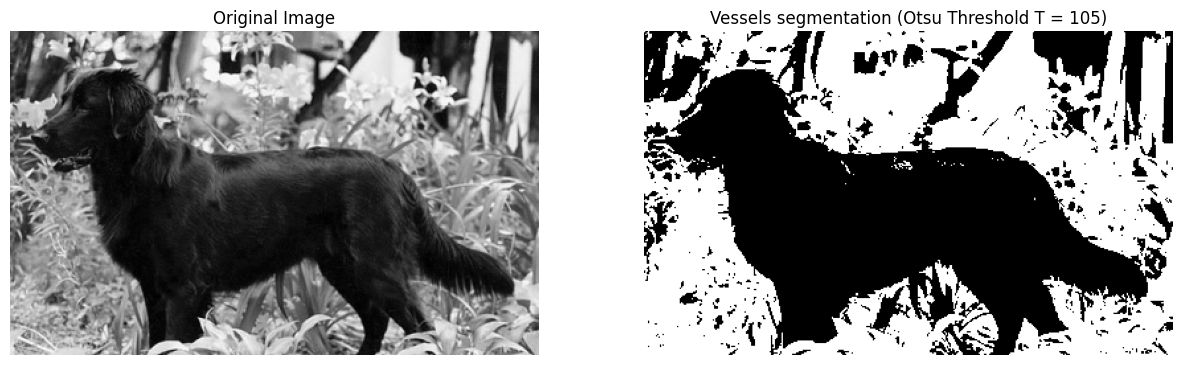

In [19]:
Segment('2008_004653.jpg','Otsu',0)

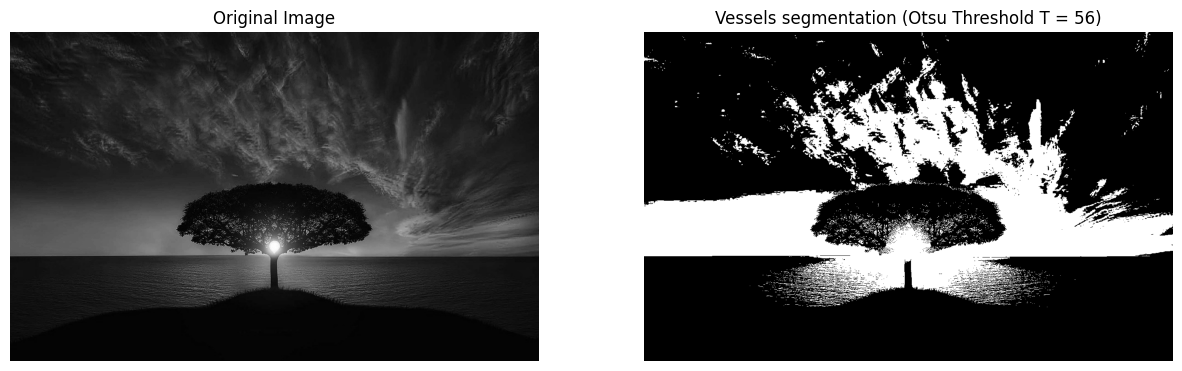

In [16]:
Segment('Tree.jpg','Otsu','na')